In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
import math

df = pd.read_csv('output.csv')
## Data Cleaning : 
mask = df['Value'].str.contains('wei')
df.loc[mask, 'Value'] = df.loc[mask, 'Value'].str.replace('wei', '')
df.loc[mask, 'Value'] = df.loc[mask, 'Value'].astype(float) * 10**18
df['Value'] = df['Value'].str.rstrip(' ETH').astype(float)


df['Txn Fee'] = df['Txn Fee'].astype(float)
df = df.drop_duplicates(subset='Hash', keep='first')
df.to_csv('output_cleaned.csv', index=False)

Value - Mean: 0.44341870379762516, Standard Deviation: 5.12116065060096
Txn Fee - Mean: 0.006326284373388345, Standard Deviation: 0.03817592629810732


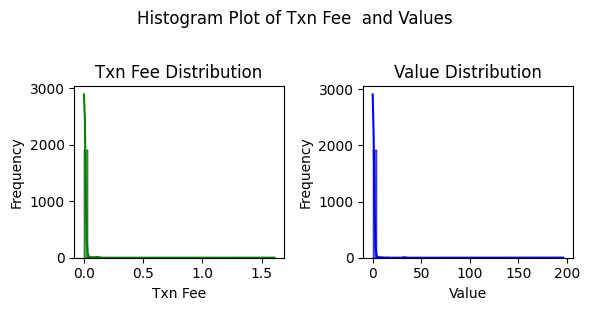

In [2]:
mean_value = df['Value'].mean()
std_value = df['Value'].std()

mean_txn_fee = df['Txn Fee'].mean()
std_txn_fee = df['Txn Fee'].std()

print(f"Value - Mean: {mean_value}, Standard Deviation: {std_value}")
print(f"Txn Fee - Mean: {mean_txn_fee}, Standard Deviation: {std_txn_fee}")


# num_bins_sturges = int(1 + math.log2(len(df['Value'])))


plt.figure(figsize=(6, 3))
plt.suptitle('Histogram Plot of Txn Fee  and Values', y=1.02) 

plt.subplot(1, 2, 1)
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), color='b', kde=True, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

When dealing with a small set of data (less than 30 points), it's better to use a simpler approach for determining the bin size in a histogram. Instead of using the Sturges formula, which may not work well with such a small dataset, we opted for the square root rule. This choice helps in creating a histogram that effectively represents the continuity of the data, especially considering the limited number of data points and the relatively low values in our dataset.

The standard deviation was found to be higher than the mean, indicating a notable degree of variability within our dataset. This suggests that our data points are quite spread out from the average.


To delve deeper into our investigation, we employ the computation of skewness and kurtosis. Skewness is determined through the third central moment, while kurtosis is assessed using the fourth central moment.

In [3]:
from scipy.stats import skew, kurtosis

skewness_value = skew(df['Value'])
kurtosis_value = kurtosis(df['Value'])

print(f"Value Skewness: {skewness_value}")
print(f"Value Kurtosis: {kurtosis_value}")

skewness_value = skew(df['Txn Fee'])
kurtosis_value = kurtosis(df['Txn Fee'])

print(f"Txn FeeSkewness  : {skewness_value}")
print(f"Txn Fee Kurtosis: {kurtosis_value}")

Value Skewness: nan
Value Kurtosis: nan
Txn FeeSkewness  : 38.30979714639741
Txn Fee Kurtosis: 1596.0740620151823


The skewness, representing the 3rd central moment, positive indicates a right-skewed distribution characterized by a moderate tail on the right side. Concurrently, the negative kurtosis, denoting the 4th central moment, implies a distribution with a less  less peaked and lighter tails than a normal distribution. The fact that the kurtosis is less than zero signifies that the distribution has thinner tails compared to a normal distribution.

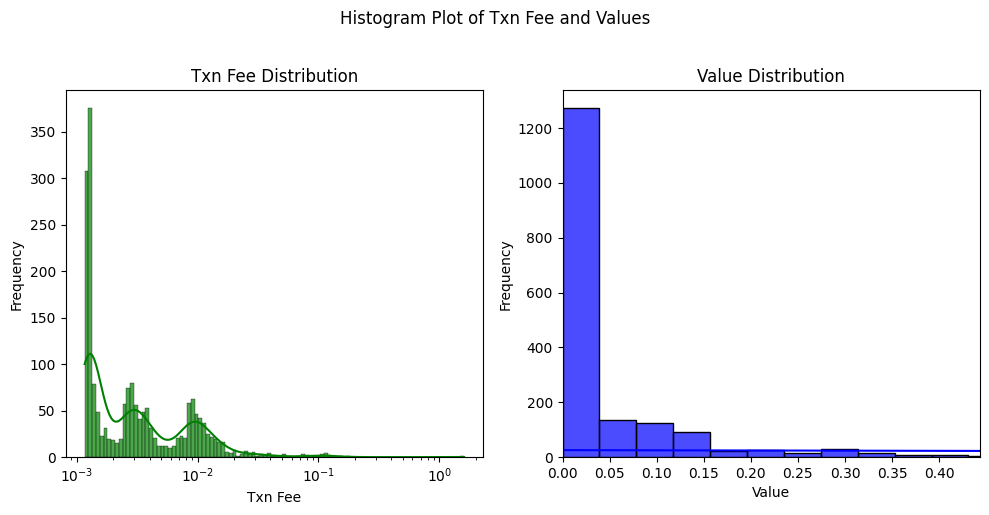

In [15]:
plt.figure(figsize=(10, 5))
plt.suptitle('Histogram Plot of Txn Fee and Values', y=1.02) 

plt.subplot(1, 2, 1)
plt.xscale('log')
sns.histplot(df['Txn Fee'], bins=100, color='g', kde=True, alpha=0.7)
plt.title('Txn Fee Distribution')
plt.xlabel('Txn Fee')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.xlim(0,df['Value'].mean()) 
# plt.xscale('log')
sns.histplot(df['Value'], bins=5000, color='b', kde=True, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


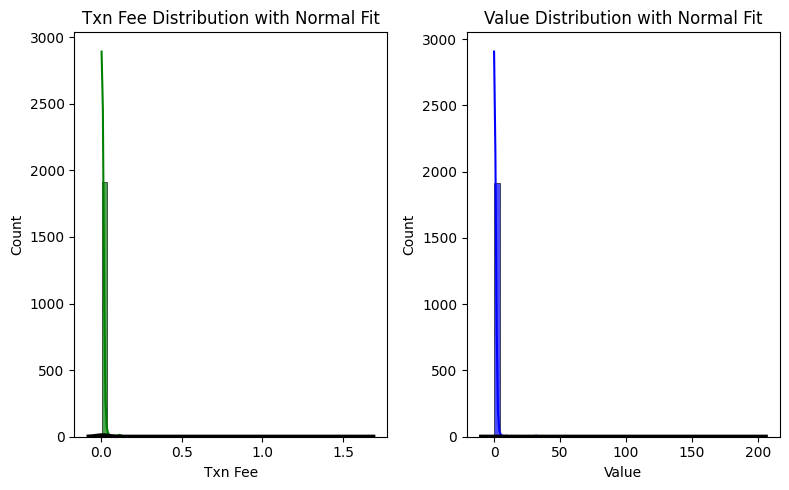

In [5]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))),kde=True, color='g', alpha=0.7)
mu, std = df['Txn Fee'].mean(), df['Txn Fee'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=3)
plt.title('Txn Fee Distribution with Normal Fit')
plt.xlabel('Txn Fee')

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))),kde=True, color='b', alpha=0.7)
mu, std = df['Value'].mean(), df['Value'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=3)
plt.title('Value Distribution with Normal Fit')
plt.xlabel('Value')
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

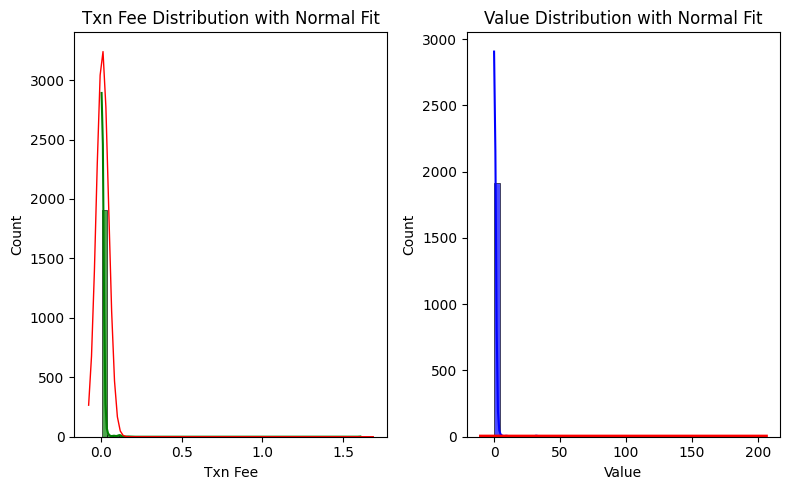

In [6]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Txn Fee'], bins=int(math.sqrt(len(df['Txn Fee']))), kde=True, color='g', alpha=0.7)
mu, std = df['Txn Fee'].mean(), df['Txn Fee'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
scaling_factor = len(df['Txn Fee']) * np.diff(np.histogram(df['Txn Fee'])[1])[0]
plt.plot(x, p * scaling_factor, 'r', linewidth=1)
plt.title('Txn Fee Distribution with Normal Fit')
plt.xlabel('Txn Fee')

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=int(math.sqrt(len(df['Value']))), kde=True, color='b', alpha=0.7)
mu, std = df['Value'].mean(), df['Value'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# df['Value'].dropna(inplace=True)
# df['Value'] = df['Value'].replace([np.inf, -np.inf], np.nan).dropna() 

# scaling_factor = len(df['Value']) * np.diff(np.histogram(df['Value'])[1])[0]
plt.plot(x, p, 'r', linewidth=3)
plt.title('Value Distribution with Normal Fit')
plt.xlabel('Value')
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

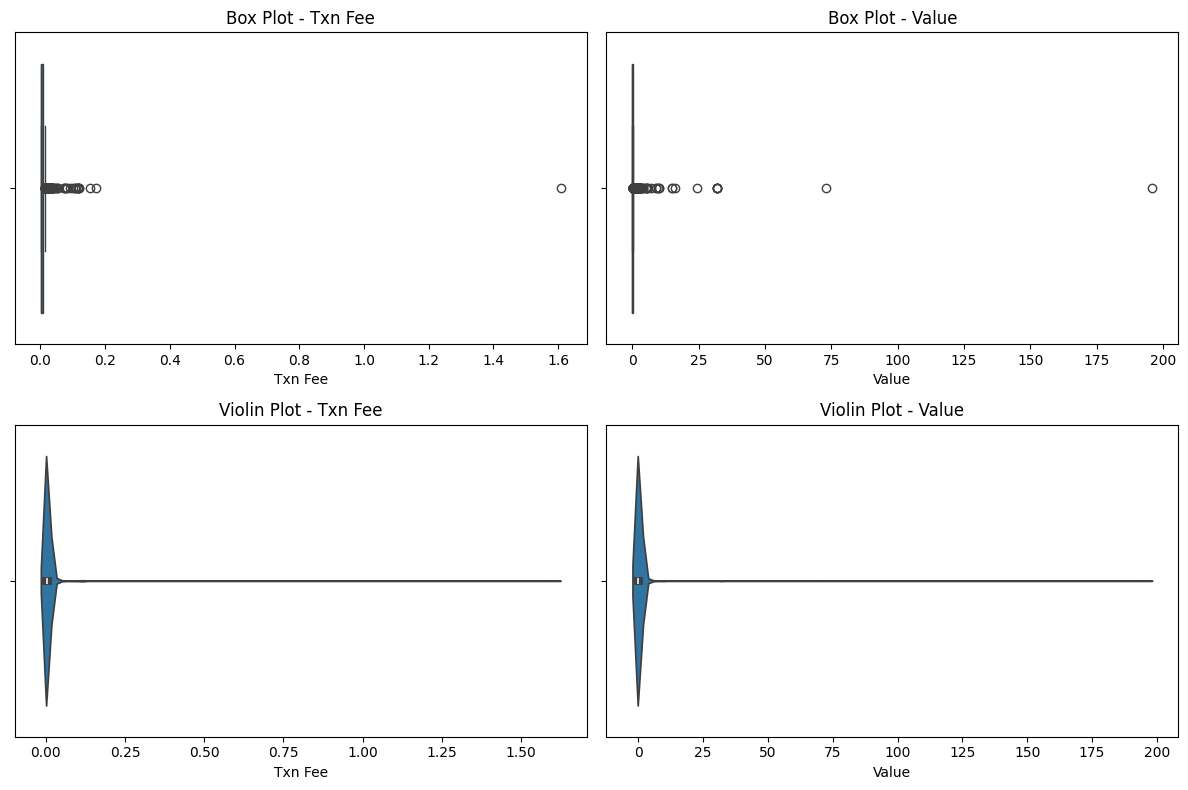

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.boxplot(x=df['Txn Fee'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot - Txn Fee')

sns.violinplot(x=df['Txn Fee'], ax=axes[1,0])
axes[1,0].set_title('Violin Plot - Txn Fee')

sns.boxplot(x=df['Value'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot - Value')

sns.violinplot(x=df['Value'], ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot - Value')

plt.tight_layout()
plt.show()
